# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [388]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [389]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

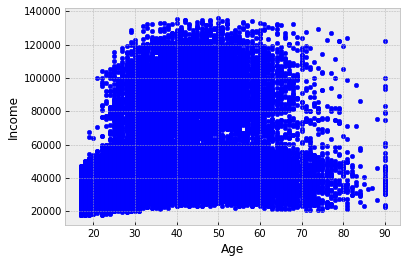

In [390]:
income.plot(x='Age', y='Income', kind='scatter')

##### Relación entre la edad y los ingresos
Por medio de la gráfica se identifica que las personas entre los 30 y 60 años son los de mayores ingresos, sin embargo, no se vé explicitamente una tendencia lineal entre la edad y el ingreso. Përo en teoría a mayor edad mayor ingreso, aunque exite bastante dispersión.

In [391]:
plt.style.use('bmh')
y = income['Income'].values
x = income['Age'].values

Text(0,0.5,'Income')

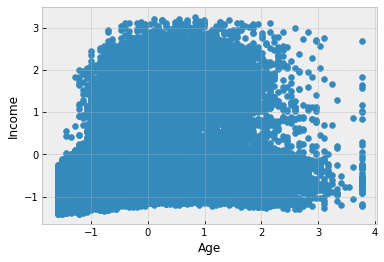

In [392]:
#Normalizamos

y_mean, y_std = y.mean(), y.std()
x_mean, x_std = x.mean(), x.std()

y = (y - y_mean)/ y_std
x = (x - x_mean)/ x_std

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Income')



##### Regresion con OLS

In [393]:
# Declaramos las variables
x = income['Age'].values
y = income['Income'].values

# Se importa la libreria de regresion lineal - OLS
from sklearn.linear_model import LinearRegression

# Inicializar
linreg0 = LinearRegression(fit_intercept=False)
linreg1 = LinearRegression()

linreg0.fit(income[['Age']], income['Income'])
linreg1.fit(income[['Age']], income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Valor de ingreso que incrementa por cada año adicional

In [394]:
linreg0.fit(x_, y)
linreg0.coef_

array([32538.08813087,   542.16765707])

Se incrementa en 542.17 por cada año + el valor del intercepto (32.538.09)

##### Predicción para los ingresos con edad de 30 años con regresión OLS

In [395]:
x = np.array([30])
linreg1.predict(x.reshape(1,-1))

array([48803.11784304])

La prediccion es de 48.803 en ingresos para 30 años

##### Predicción para los ingresos con edad de 40 años con regresión OLS

In [396]:
x = np.array([40])
linreg1.predict(x.reshape(1,-1))

array([54224.79441376])

La prediccion es de 54.225 en ingresos para 40 años

# Exercise 4.2
Evaluate the model using the MSE

In [397]:
x1 = income[['Age']].values

linreg1.fit(x1, y)
linreg1.coef_

array([542.16765707])

In [398]:
from sklearn import metrics
import numpy as np

y_pred = linreg1.predict(x1)
print('MSE:', metrics.mean_squared_error(y, y_pred))

MSE: 593783043.8402299



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

##### Agregamos una nueva columna con los valores de la edad al cuadrado

In [399]:
# Agregamos un nueva variables de Edad al cuadrado de regresion OLS con intercepto

income['Age2'] = income['Age']**2
x2 = income[['Age','Age2']].values

linreg0.fit(x2, y)
linreg0.coef_

array([2346.62896328,  -21.97439239])

In [400]:
# Agregamos un nueva variables de Edad al cuadrado de regresion OLS sin intercepto

income['Age2'] = income['Age']**2
x2 = income[['Age','Age2']].values

linreg1.fit(x2, y)
linreg1.coef_

array([3131.77014151,  -30.54341041])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [401]:
# Incluimos una nueva variable con 3 betas, se adiciona "Horas por semana", regresion OLS con intercepto

x3 = income[['Age','Age2', 'Hours per week']].values

linreg0.fit(x3, y)
linreg0.coef_

array([1577.55338079,  -13.31272063,  376.42672823])

In [402]:
# Incluimos una nueva variable con 3 betas, se adiciona "Horas por semana", regresion OLS sin intercepto

x3 = income[['Age','Age2', 'Hours per week']].values

linreg1.fit(x3, y)
linreg1.coef_

array([2479.30377208,  -23.13950425,  397.36310712])






# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [403]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X


What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [404]:
# Reemplazamos los  Falso y verdadero, por 0 y 1 respectivamente

data["Churn?"].replace(['False.', 'True.'], [0, 1], inplace=True)

In [405]:
# Se crean las variables y y las x

y = data['Churn?'].values
X = data[['Day Calls', 'Eve Charge', 'Night Mins', 'CustServ Calls']].values

In [406]:
# Se muestran los valores de los clientes True = 1 y False = 0

counts=data['Churn?'].value_counts()
print(counts)

0    2850
1     483
Name: Churn?, dtype: int64


El 86% presenta Churn Falso y el 14% presenta Churn Verdadero

Text(0,0.5,'Numbero de clientes')

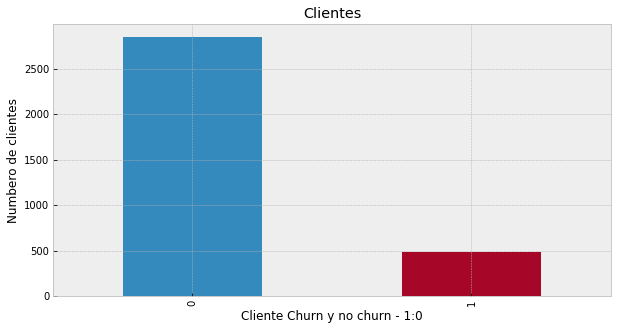

In [407]:
fig=plt.figure(figsize=(10,5))
ax=fig.gca()
counts.plot.bar(ax=ax)
ax.set_title("Clientes")
ax.set_xlabel("Cliente Churn y no churn - 1:0")
ax.set_ylabel("Numbero de clientes")

In [408]:
# Division de los datos

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [410]:
# Conjunto de pruebas

y_pred = logreg.predict(X_test)

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [411]:
# Matriz de confusion

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[859   2]
 [137   2]]


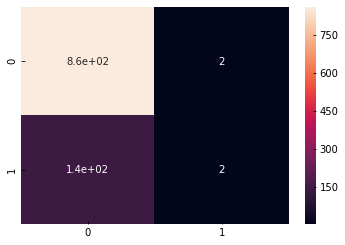

In [412]:
# Gráfico de la matriz

label = ["0","1"]
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [413]:
# Tasa de clasificación

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))     

# Presicion de predicción

print("Precision:",metrics.precision_score(y_test, y_pred))   

Accuracy: 0.861
Precision: 0.5
